# IBM HR Analytics Dataset - Initial Exploration

ここではKaggleで公開されている[IBMのHRアナリティクス従業員離職・パフォーマンスデータセット](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)を用いてEDA（探索的データ分析）をおこなっています。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configure matplotlib and seaborn
plt.style.use('ggplot')
sns.set(style='whitegrid')
%matplotlib inline

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
# Load the dataset
data_path = os.path.join('..', '..', 'data', 'raw', 'WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = pd.read_csv(data_path)

# Display basic info
print(f"Dataset shape: {df.shape}")
df.head()

In [3]:
# # google colabを使用する場合

# # Load the dataset
# data_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition.csv'
# df = pd.read_csv(data_path)

# # Display basic info
# print(f"Dataset shape: {df.shape}")
# df.head()

Dataset shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Check basic statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values")

Missing values:
No missing values


## 目的変数の分析: Attrition（離職について）

Attrition counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition percentage:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


<ipython-input-7-6cba849df346>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count + 30, f"{count} ({attrition_pct[i]:.1f}%)",


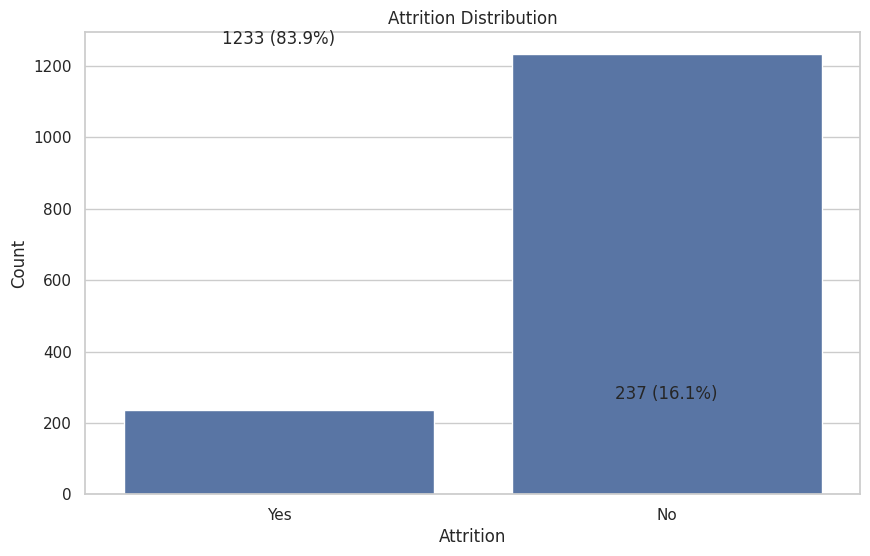

In [7]:
# Overall attrition rate
attrition_count = df['Attrition'].value_counts()
attrition_pct = df['Attrition'].value_counts(normalize=True) * 100

print(f"Attrition counts:\n{attrition_count}")
print(f"\nAttrition percentage:\n{attrition_pct}")

# Plot attrition distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')

for i, count in enumerate(attrition_count):
    plt.text(i, count + 30, f"{count} ({attrition_pct[i]:.1f}%)",
             horizontalalignment='center')

plt.show()

## Departmental Analysis（部署ごとの分析）

Department distribution:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


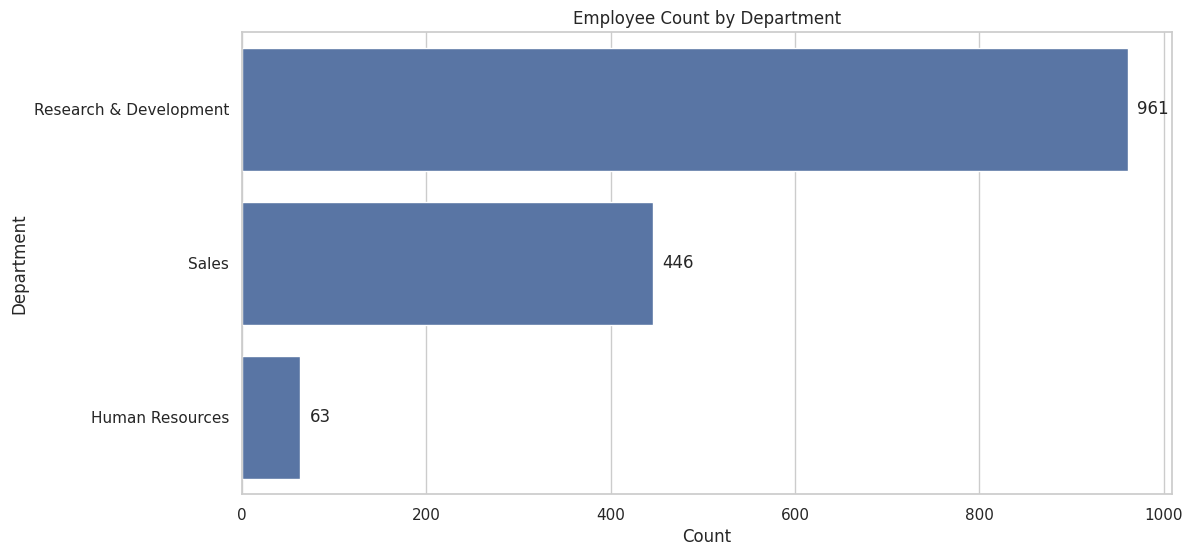

In [8]:
# Department distribution
dept_counts = df['Department'].value_counts()
print("Department distribution:")
print(dept_counts)

# Plot department distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Department', data=df, order=dept_counts.index)
plt.title('Employee Count by Department')
plt.xlabel('Count')
plt.ylabel('Department')
for i, count in enumerate(dept_counts):
    plt.text(count + 10, i, str(count), va='center')
plt.show()

Attrition rate by department:
               Department  Attrition Rate (%)
2                   Sales           20.627803
0         Human Resources           19.047619
1  Research & Development           13.839750


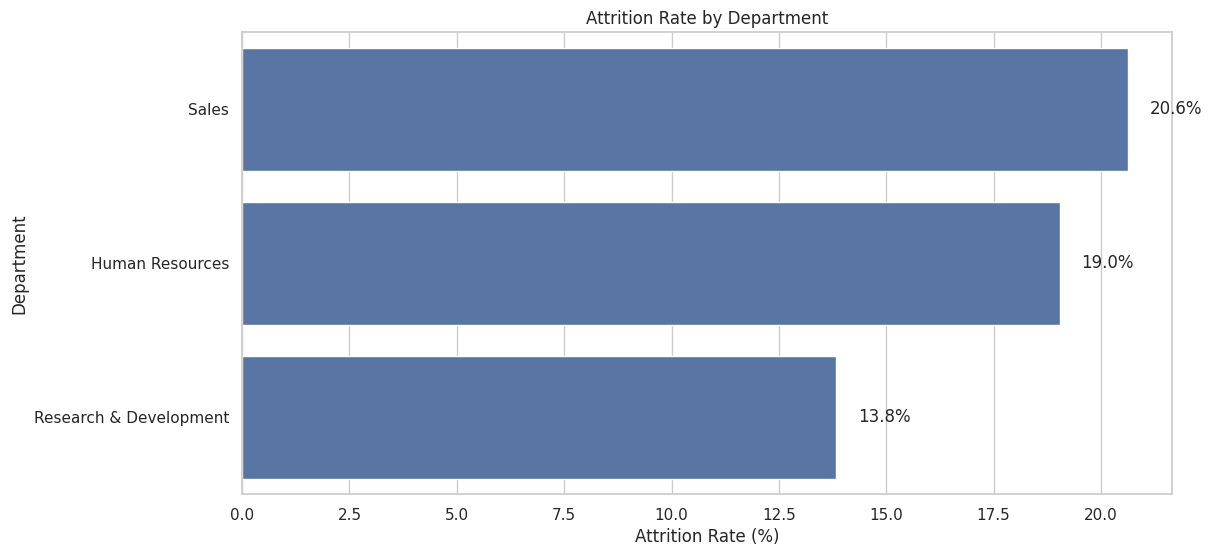

In [9]:
# Attrition by department
dept_attrition = df.groupby('Department')['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()
dept_attrition.columns = ['Department', 'Attrition Rate (%)']
dept_attrition = dept_attrition.sort_values('Attrition Rate (%)', ascending=False)

print("Attrition rate by department:")
print(dept_attrition)

# Plot attrition by department
plt.figure(figsize=(12, 6))
sns.barplot(x='Attrition Rate (%)', y='Department', data=dept_attrition)
plt.title('Attrition Rate by Department')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Department')
for i, rate in enumerate(dept_attrition['Attrition Rate (%)']):
    plt.text(rate + 0.5, i, f"{rate:.1f}%", va='center')
plt.show()

## Age and Experience Analysis（年齢と職務経験に関する分析）

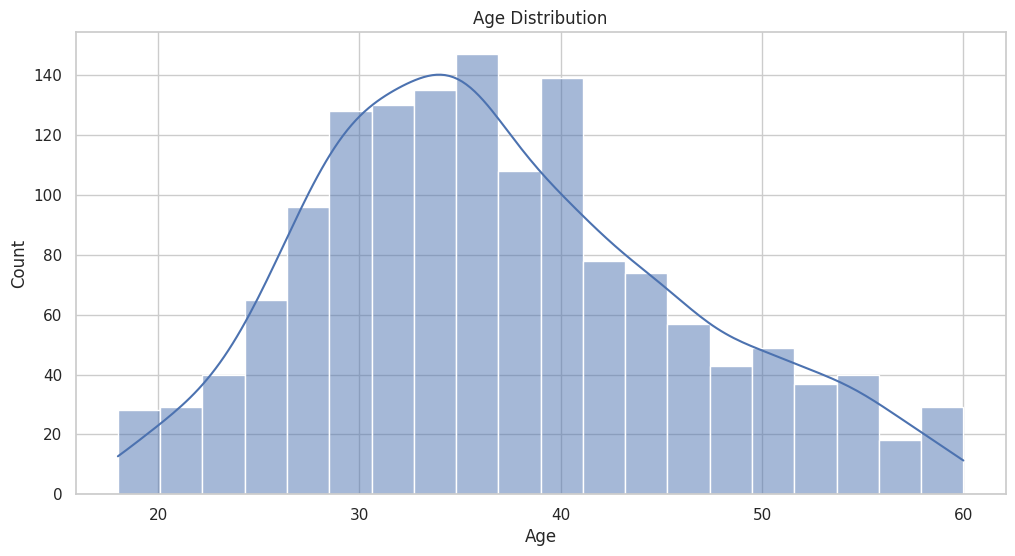

<ipython-input-10-67622784e83a>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_attrition = df.groupby('AgeGroup')['Attrition'].apply(


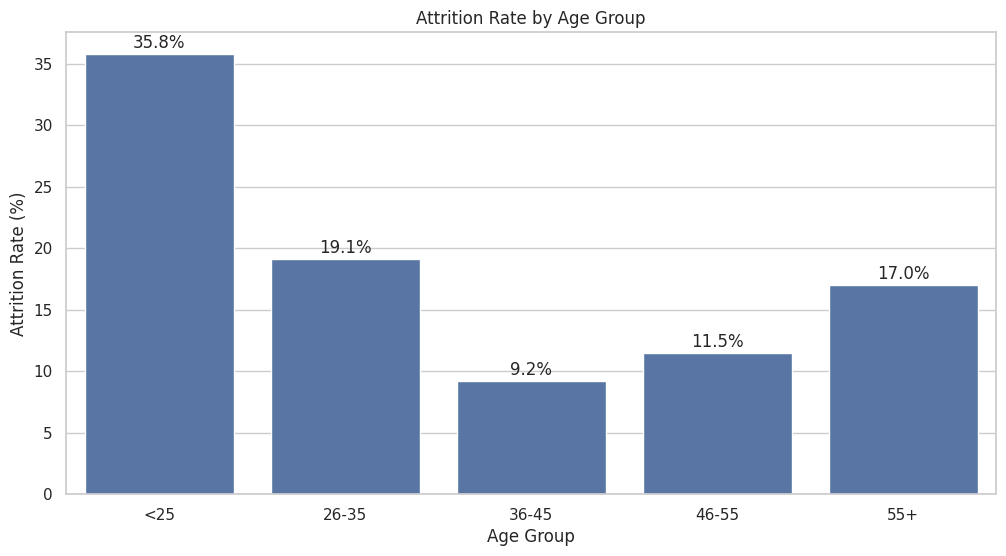

In [10]:
# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Attrition by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100],
                        labels=['<25', '26-35', '36-45', '46-55', '55+'])

age_attrition = df.groupby('AgeGroup')['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()
age_attrition.columns = ['Age Group', 'Attrition Rate (%)']

plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Attrition Rate (%)', data=age_attrition)
plt.title('Attrition Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate (%)')
for i, rate in enumerate(age_attrition['Attrition Rate (%)']):
    plt.text(i, rate + 0.5, f"{rate:.1f}%", ha='center')
plt.show()

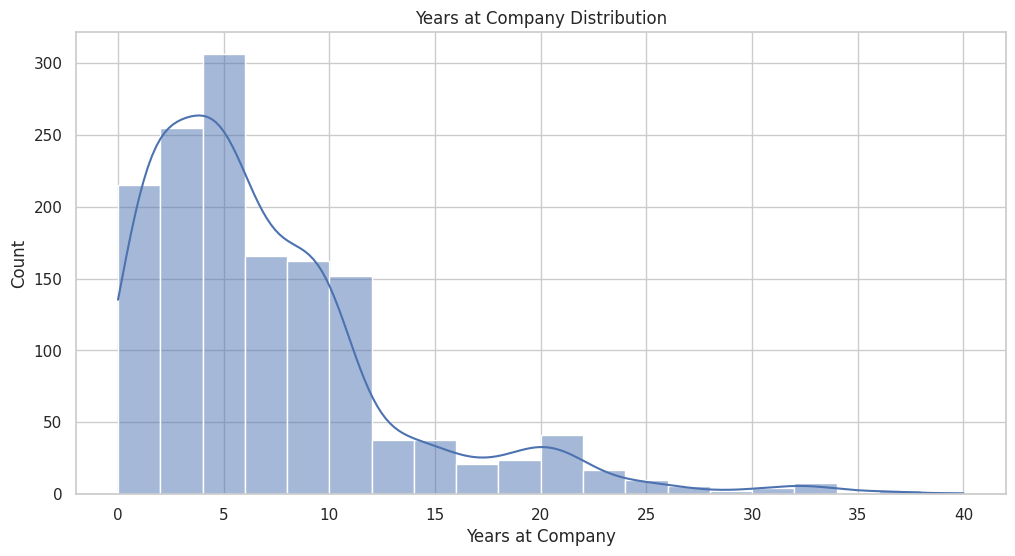

<ipython-input-11-c9aa8ff6aa1e>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_attrition = df.groupby('TenureGroup')['Attrition'].apply(


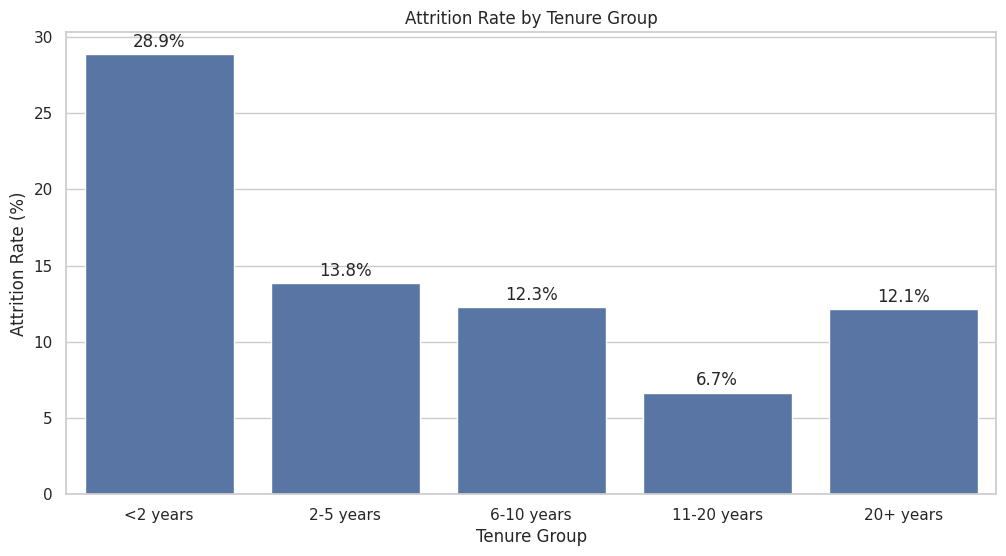

In [11]:
# Years at company
plt.figure(figsize=(12, 6))
sns.histplot(df['YearsAtCompany'], bins=20, kde=True)
plt.title('Years at Company Distribution')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.show()

# Attrition by years at company
df['TenureGroup'] = pd.cut(df['YearsAtCompany'],
                           bins=[0, 2, 5, 10, 20, 100],
                           labels=['<2 years', '2-5 years', '6-10 years', '11-20 years', '20+ years'])

tenure_attrition = df.groupby('TenureGroup')['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()
tenure_attrition.columns = ['Tenure Group', 'Attrition Rate (%)']

plt.figure(figsize=(12, 6))
sns.barplot(x='Tenure Group', y='Attrition Rate (%)', data=tenure_attrition)
plt.title('Attrition Rate by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Attrition Rate (%)')
for i, rate in enumerate(tenure_attrition['Attrition Rate (%)']):
    plt.text(i, rate + 0.5, f"{rate:.1f}%", ha='center')
plt.show()

## Satisfaction and Work-Life Balance Analysis（満足度とワークライフバランスに関する分析）

Job Satisfaction distribution:
JobSatisfaction
1    289
2    280
3    442
4    459
Name: count, dtype: int64


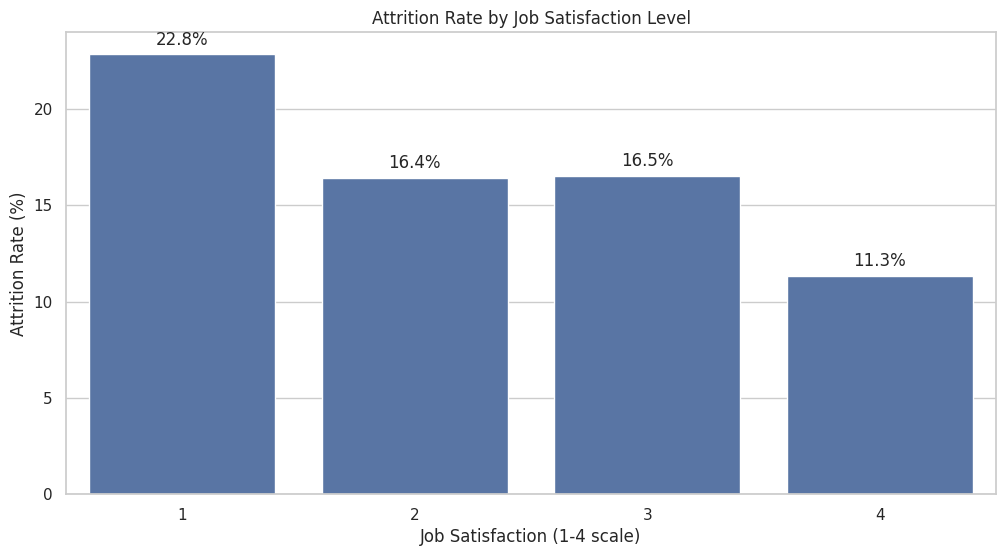

In [12]:
# Job satisfaction
job_sat_counts = df['JobSatisfaction'].value_counts().sort_index()
print("Job Satisfaction distribution:")
print(job_sat_counts)

# Attrition by job satisfaction
job_sat_attrition = df.groupby('JobSatisfaction')['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()
job_sat_attrition.columns = ['Job Satisfaction', 'Attrition Rate (%)']

plt.figure(figsize=(12, 6))
sns.barplot(x='Job Satisfaction', y='Attrition Rate (%)', data=job_sat_attrition)
plt.title('Attrition Rate by Job Satisfaction Level')
plt.xlabel('Job Satisfaction (1-4 scale)')
plt.ylabel('Attrition Rate (%)')
for i, rate in enumerate(job_sat_attrition['Attrition Rate (%)']):
    plt.text(i, rate + 0.5, f"{rate:.1f}%", ha='center')
plt.show()

Work-Life Balance distribution:
WorkLifeBalance
1     80
2    344
3    893
4    153
Name: count, dtype: int64


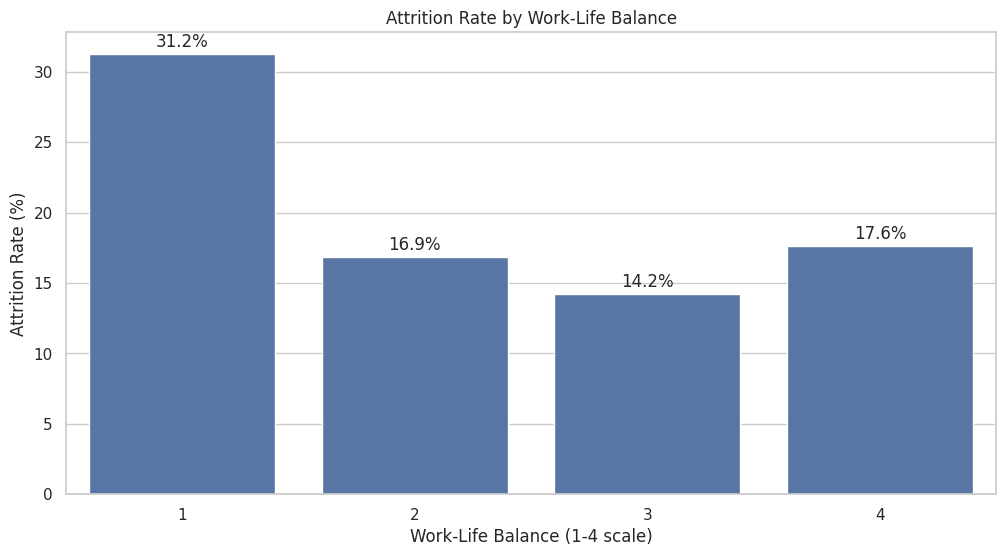

In [13]:
# Work-life balance
wlb_counts = df['WorkLifeBalance'].value_counts().sort_index()
print("Work-Life Balance distribution:")
print(wlb_counts)

# Attrition by work-life balance
wlb_attrition = df.groupby('WorkLifeBalance')['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()
wlb_attrition.columns = ['Work-Life Balance', 'Attrition Rate (%)']

plt.figure(figsize=(12, 6))
sns.barplot(x='Work-Life Balance', y='Attrition Rate (%)', data=wlb_attrition)
plt.title('Attrition Rate by Work-Life Balance')
plt.xlabel('Work-Life Balance (1-4 scale)')
plt.ylabel('Attrition Rate (%)')
for i, rate in enumerate(wlb_attrition['Attrition Rate (%)']):
    plt.text(i, rate + 0.5, f"{rate:.1f}%", ha='center')
plt.show()

## Compensation Analysis（給与・報酬に関する分析）

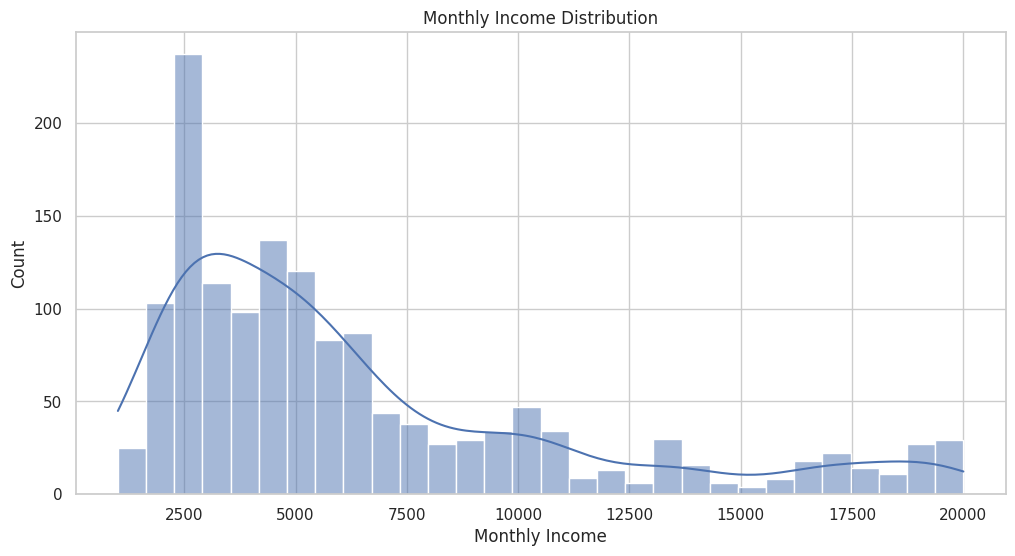

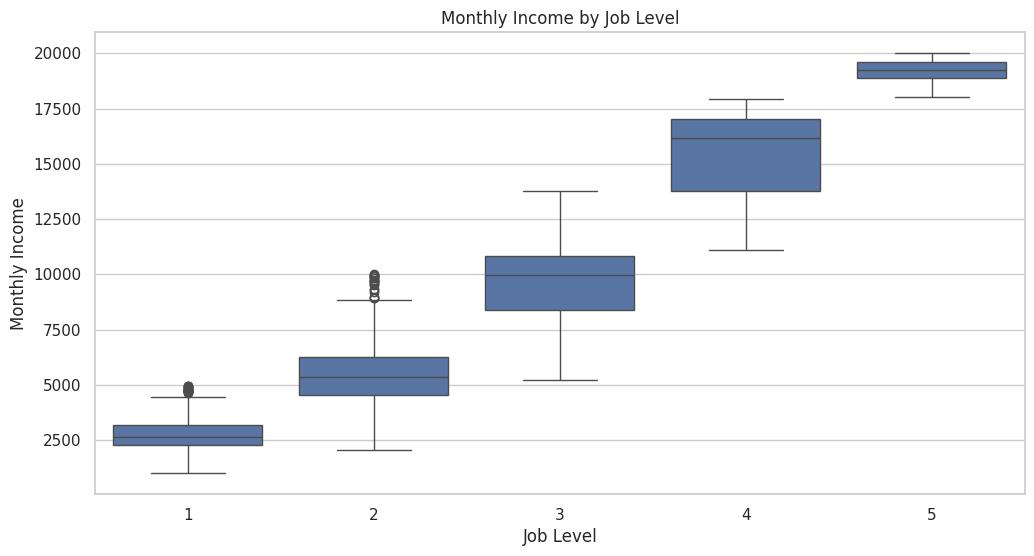

<ipython-input-14-fc53bbdc2e95>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_attrition = df.groupby('IncomeLevel')['Attrition'].apply(


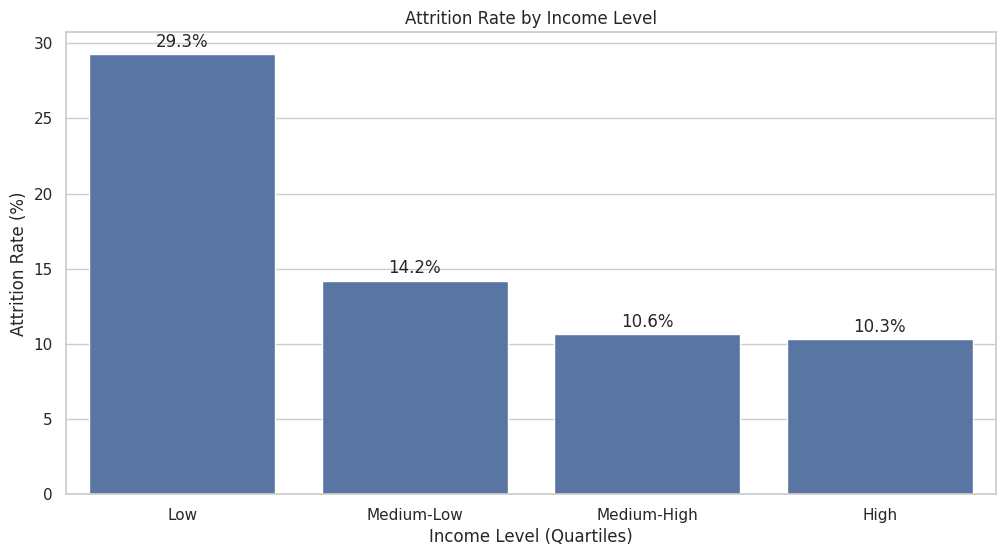

In [14]:
# Monthly income distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True)
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

# Monthly income by job level
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
plt.show()

# Attrition by income quartiles
df['IncomeLevel'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

income_attrition = df.groupby('IncomeLevel')['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()
income_attrition.columns = ['Income Level', 'Attrition Rate (%)']

plt.figure(figsize=(12, 6))
sns.barplot(x='Income Level', y='Attrition Rate (%)', data=income_attrition)
plt.title('Attrition Rate by Income Level')
plt.xlabel('Income Level (Quartiles)')
plt.ylabel('Attrition Rate (%)')
for i, rate in enumerate(income_attrition['Attrition Rate (%)']):
    plt.text(i, rate + 0.5, f"{rate:.1f}%", ha='center')
plt.show()

## Additional Factors Analysis（その他の要因の分析）

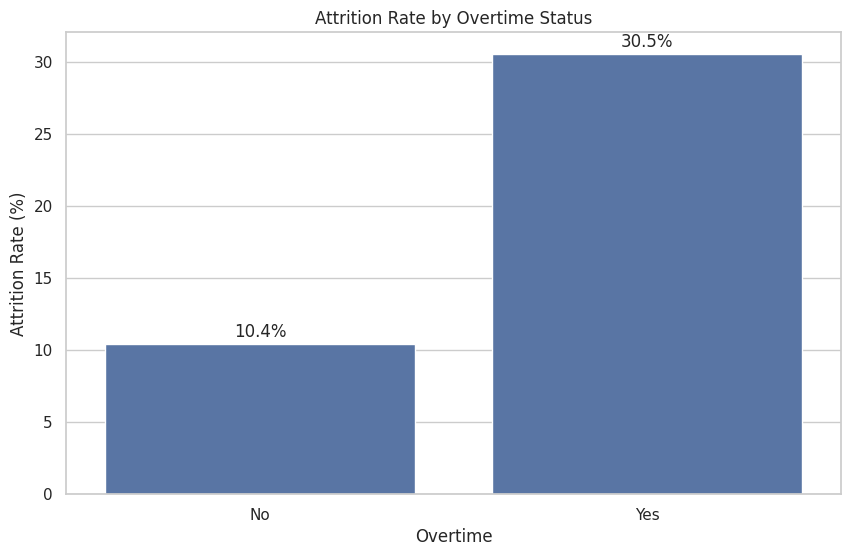

In [15]:
# Overtime and attrition
overtime_attrition = df.groupby('OverTime')['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()
overtime_attrition.columns = ['Overtime', 'Attrition Rate (%)']

plt.figure(figsize=(10, 6))
sns.barplot(x='Overtime', y='Attrition Rate (%)', data=overtime_attrition)
plt.title('Attrition Rate by Overtime Status')
plt.xlabel('Overtime')
plt.ylabel('Attrition Rate (%)')
for i, rate in enumerate(overtime_attrition['Attrition Rate (%)']):
    plt.text(i, rate + 0.5, f"{rate:.1f}%", ha='center')
plt.show()

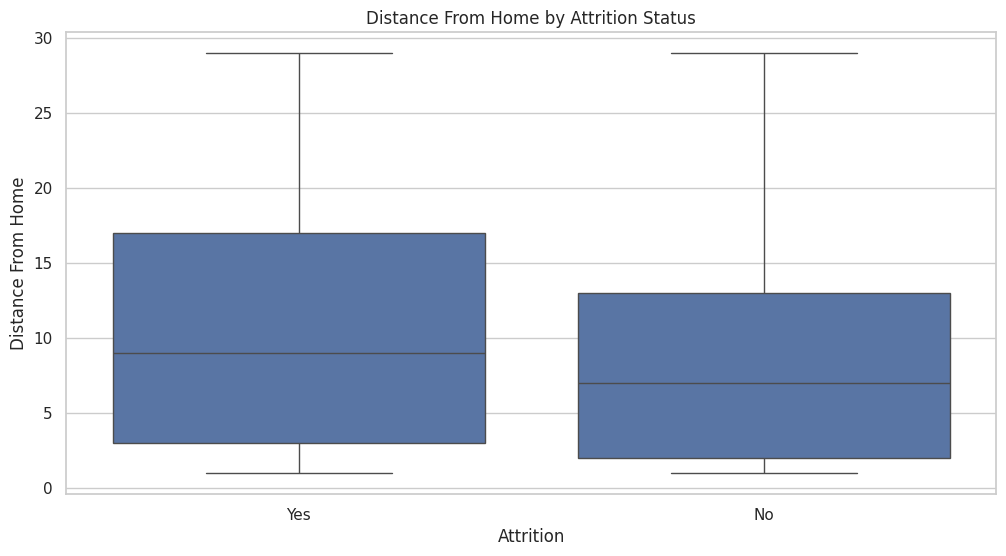

<ipython-input-16-6cfc08467f43>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_attrition = df.groupby('DistanceGroup')['Attrition'].apply(


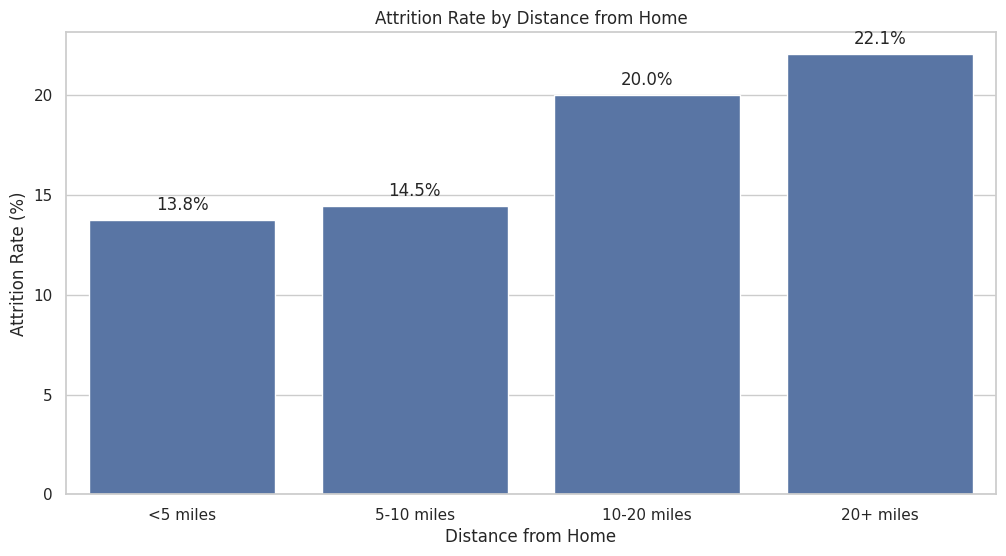

In [16]:
# Distance from home
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('Distance From Home by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Distance From Home')
plt.show()

# Create distance groups
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'],
                             bins=[0, 5, 10, 20, 30],
                             labels=['<5 miles', '5-10 miles', '10-20 miles', '20+ miles'])

distance_attrition = df.groupby('DistanceGroup')['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()
distance_attrition.columns = ['Distance Group', 'Attrition Rate (%)']

plt.figure(figsize=(12, 6))
sns.barplot(x='Distance Group', y='Attrition Rate (%)', data=distance_attrition)
plt.title('Attrition Rate by Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Attrition Rate (%)')
for i, rate in enumerate(distance_attrition['Attrition Rate (%)']):
    plt.text(i, rate + 0.5, f"{rate:.1f}%", ha='center')
plt.show()

## Correlation Analysis（相関分析）

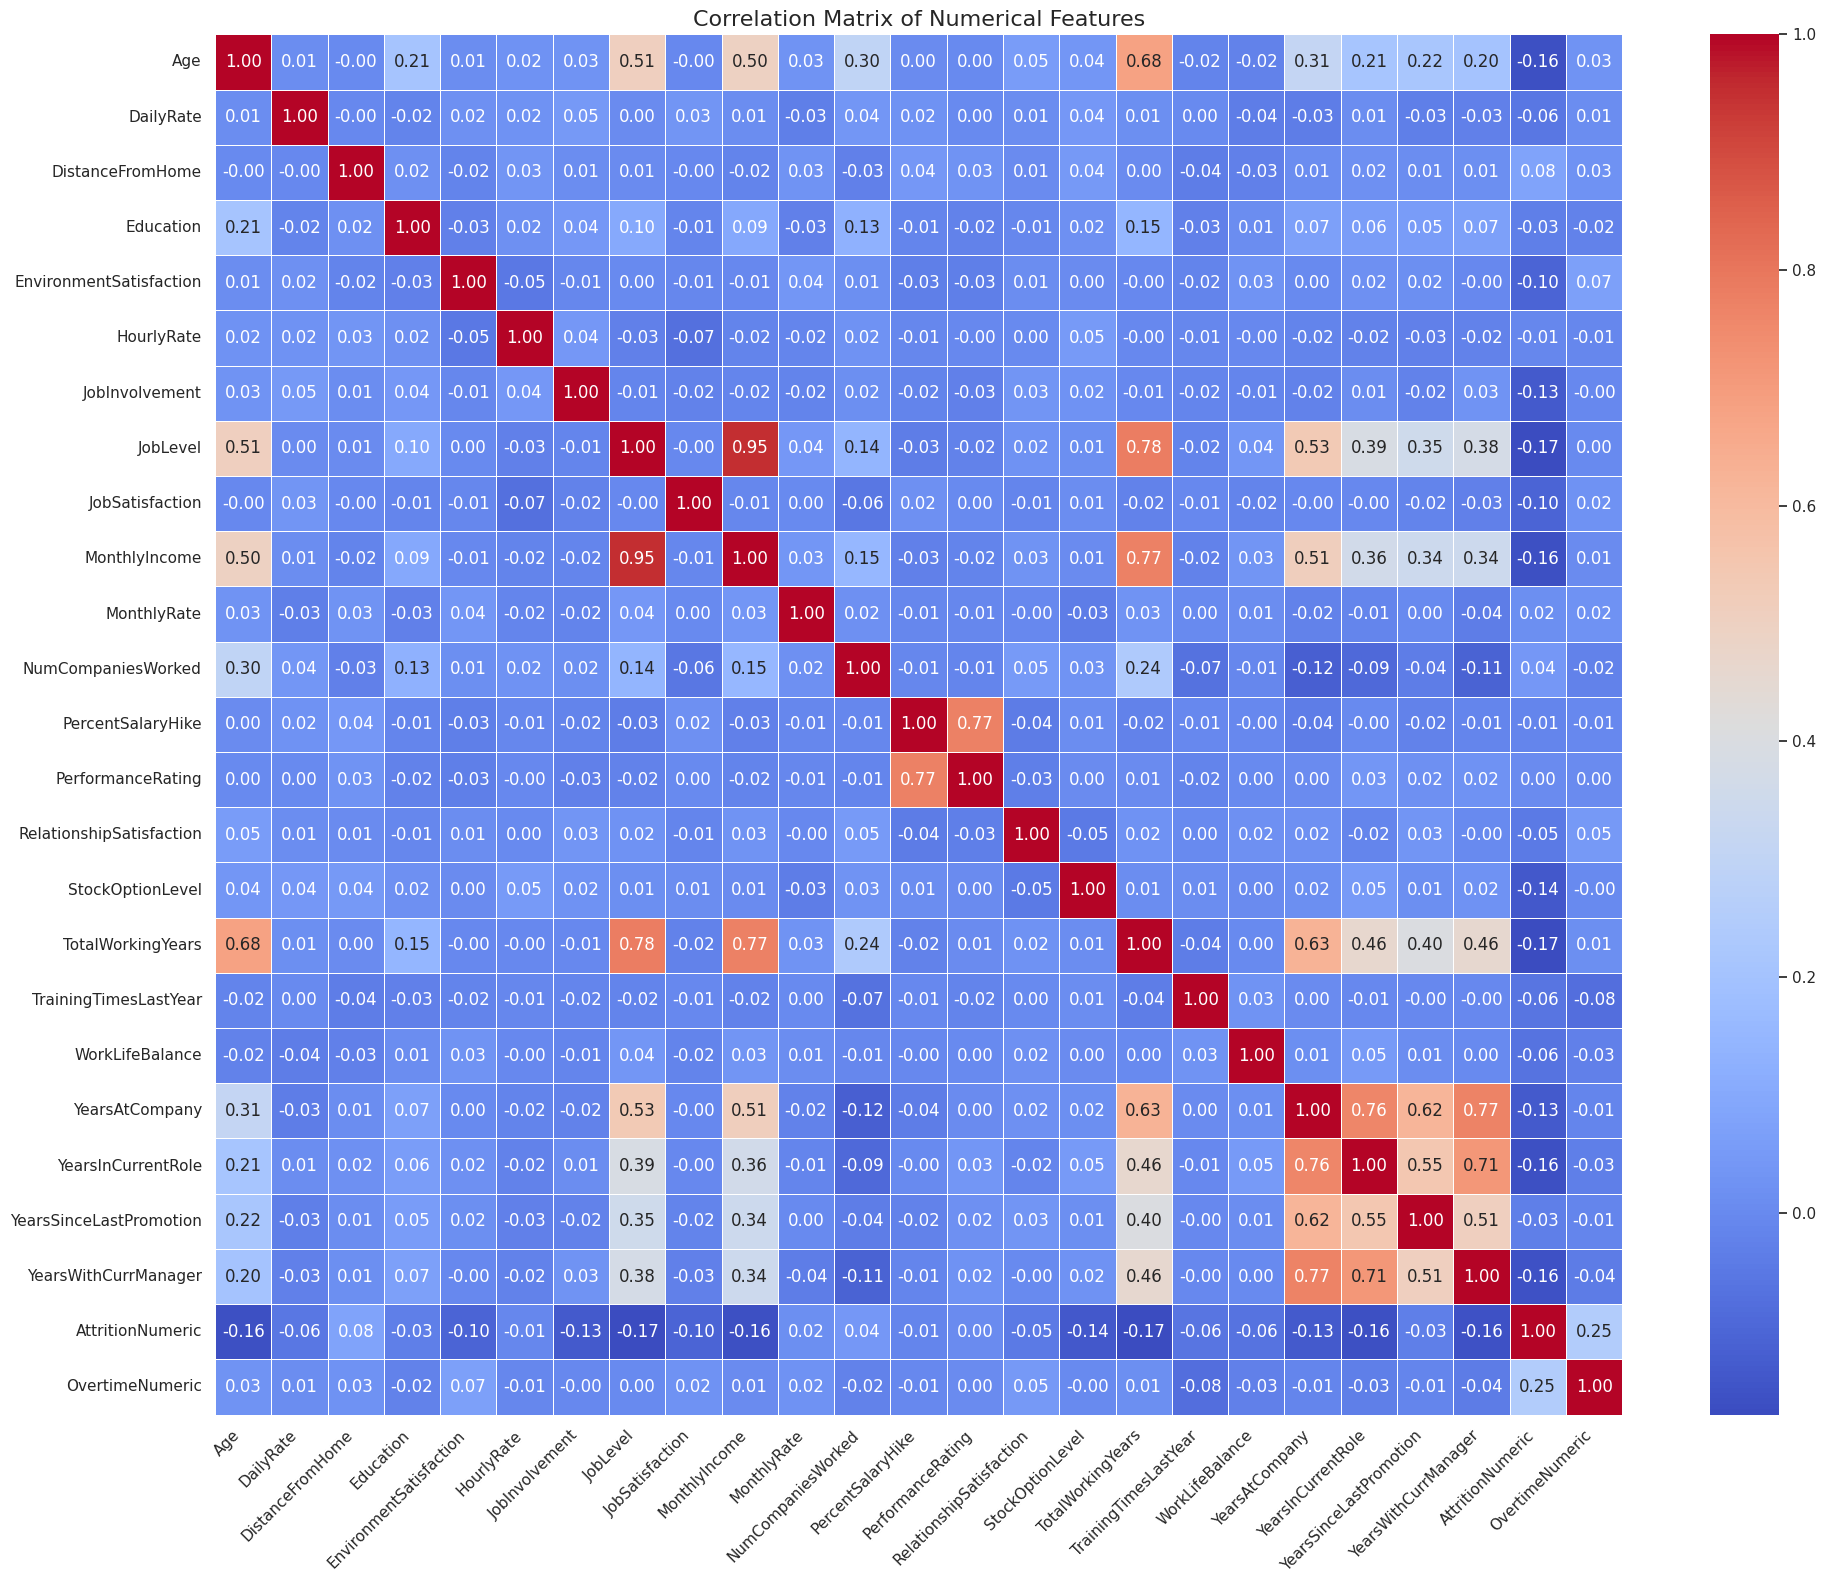

In [17]:
# Convert categorical variables to numeric for correlation analysis
df_numeric = df.copy()
df_numeric['AttritionNumeric'] = (df_numeric['Attrition'] == 'Yes').astype(int)
df_numeric['OvertimeNumeric'] = (df_numeric['OverTime'] == 'Yes').astype(int)

# Select numerical columns for correlation
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
            'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
            'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
            'AttritionNumeric', 'OvertimeNumeric']

# Calculate correlation matrix
corr_matrix = df_numeric[num_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Features most correlated with attrition:
AttritionNumeric            1.000000
OvertimeNumeric             0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: AttritionNumeric, dtype: flo

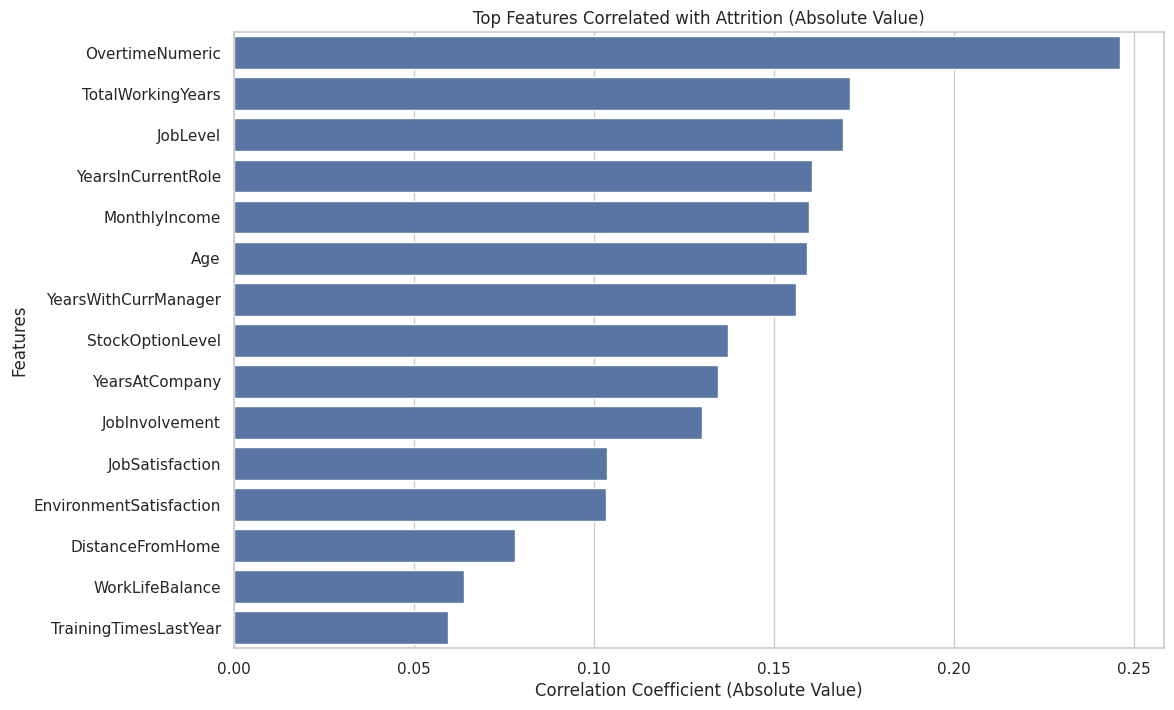

In [18]:
# Focus on correlation with attrition
attrition_corr = corr_matrix['AttritionNumeric'].sort_values(ascending=False)
print("Features most correlated with attrition:")
print(attrition_corr)

# Plot top correlations with attrition
plt.figure(figsize=(12, 8))
attrition_corr_filtered = attrition_corr[attrition_corr.index != 'AttritionNumeric']
top_corr = attrition_corr_filtered.abs().sort_values(ascending=False).head(15)
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top Features Correlated with Attrition (Absolute Value)')
plt.xlabel('Correlation Coefficient (Absolute Value)')
plt.ylabel('Features')
plt.show()

## わかったこと & まとめ（仮）

探索的分析の結果、主な発見事項は以下の通りです。

1.  **全体離職率**: データセット全体の離職率は約16%でした。

2.  **部署の影響**: 離職率が最も高いのは営業部であり、次いで人事部、研究開発部となっています。

3.  **年齢要因**: 若手社員（30歳未満）は、年齢の高い社員と比較して著しく高い離職率を示しています。

4.  **勤続年数の影響**: 勤続年数が2年未満の社員は、離職する可能性が高い傾向にあります。

5.  **仕事の満足度**: 仕事の満足度が低いほど、離職率が高いという強い相関関係が見られました。

6.  **報酬**: 所得層が低いほど、離職率が大幅に高くなっています。

7.  **残業**: 残業をしている社員は、残業をしていない社員と比較して、離職率がほぼ2倍になっています。

8.  **自宅からの距離**: 通勤距離が長いほど、離職率が高い傾向にあります。

9.  **主な相関要因**: 離職との相関が最も強い要因は、順に、残業、役職レベル、月収、総勤務年数、仕事の満足度です。

In [ ]:
# Create a processed version of the dataset with engineered features
processed_df = df.copy()

# Add additional engineered features for dashboard
processed_df['AttritionBinary'] = (processed_df['Attrition'] == 'Yes').astype(int)
processed_df['OvertimeBinary'] = (processed_df['OverTime'] == 'Yes').astype(int)

# Create standardized satisfaction score (average of all satisfaction metrics)
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction',
                     'WorkLifeBalance', 'RelationshipSatisfaction']
processed_df['OverallSatisfaction'] = processed_df[satisfaction_cols].mean(axis=1)

# Save processed dataset
processed_path = os.path.join('..', '..', 'data', 'processed', 'hr_data_processed.csv')
processed_df.to_csv(processed_path, index=False)
print(f"Processed dataset saved to {processed_path}")

In [20]:
# # google colabを使用する場合

# # Create a processed version of the dataset with engineered features
# processed_df = df.copy()

# # Add additional engineered features for dashboard
# processed_df['AttritionBinary'] = (processed_df['Attrition'] == 'Yes').astype(int)
# processed_df['OvertimeBinary'] = (processed_df['OverTime'] == 'Yes').astype(int)

# # Create standardized satisfaction score (average of all satisfaction metrics)
# satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction',
#                     'WorkLifeBalance', 'RelationshipSatisfaction']
# processed_df['OverallSatisfaction'] = processed_df[satisfaction_cols].mean(axis=1)

# # Save processed dataset
# processed_path = '/content/hr_data_processed.csv'
# processed_df.to_csv(processed_path, index=False)
# print(f"Processed dataset saved to {processed_path}")

Processed dataset saved to /content/hr_data_processed.csv
